[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dapivei/causal-infere/blob/main/sections/5_Experiments.ipynb)

$$
\begin{array}{c}
\textbf{EXPERIMENTS}\\\\\\\\
\textbf{(CONTINUATION)}\\\\\\\\
\textbf{Daniela Pinto Veizaga, Xiang Pan, and Xiang Gao} \\
\textit{Center for Data Science, New York University} \\\\\\
\textit{October 4, 2024}
\end{array}
$$


## 0. Recap From Last Class
-


## 1. Goals For Today



a. Walk through the process of estimating causal quantities from sample data

b. Assess Confidence in Estimated Causal Quantities

c. Explore Relaxing SUTVA and Perfect Compliance Assumptions

d. Recap on sampling distributions and the Central Limit Theorem (CLT) on Python -- HELP FOR HOMEWORK!


## 2. Estimating Causal Effects from Sample Data

Our objective is to estimate the **Average Treatment Effect (ATE)**, which measures the difference in outcomes between individuals who received a treatment and those who did not.

To do this, we rely on two key assumptions: **perfect compliance** and **SUTVA** that allow us to assert that the treatment, $S$, is **independent** of other factors, $U$, that could influence the outcome $Y$, leading to:

$$
ATE = \mathbb{E}[Y(S=1, U) \mid S=1] - \mathbb{E}[Y(S=0, U) \mid S=0].
$$


Let’s apply these concepts to estimate the Average Treatment Effect (ATE) through a case study on the impact of a job training program ($S$) on wages ($Y$):
 > the **National Supported Work (NSW) Demonstration**, designed to enhance income levels.

Participants were _randomly assigned_ to receive job training or not, which helps ensure independence from confounding factors and supports our underlying assumptions.

Our goal is to replicate the estimation conducted by LaLonde, who utilized data from this randomized evaluation to assess the program's effectiveness. For more detailed information about the study, refer to the following resource: [LaLonde's Study](https://search.r-project.org/CRAN/refmans/designmatch/html/lalonde.html).




In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
url_base = 'http://www.nber.org/~rdehejia/data/nsw.dta'
data = pd.read_stata(url_base)

In [17]:
data.describe()

,treat,age,education,black,hispanic,married,nodegree,re75,re78
count,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000
mean,0.411357,24.520776,10.267313,0.800554,0.105263,0.162050,0.779778,3042.896484,5454.635742
std,0.492421,6.625947,1.704774,0.399861,0.307105,0.368752,0.414683,5066.138672,6252.948242
min,0.000000,17.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,23.000000,10.000000,1.000000,0.000000,0.000000,1.000000,936.307953,3951.889038
75%,1.000000,27.000000,11.000000,1.000000,0.000000,0.000000,1.000000,3993.206970,8772.004395
max,1.000000,55.000000,16.000000,1.000000,1.000000,1.000000,1.000000,37431.660156,60307.929688



### 2.1) Causal Model for Impact of Job Training Program on Wages

Some key components of this causal model are:

- **Treatment Indicator ($S$)**: This binary variable, denoted as $\text{treat}$, indicates whether an individual received job training (1) or not (0).

- **Outcome ($Y$)**: The primary outcomes of interest are the annual wages of participants measured in the year 1978, represented $\text{re78}$.

- **Confounding Variables ($U$)**: Additional factors that may affect wages include age, education, race, marital status, and degree.

For more detailed information about the study, refer [here](https://search.r-project.org/CRAN/refmans/designmatch/html/lalonde.html).



In [ ]:
data['treat'].value_counts()

,count
treat,
0,425
1,297


### 2.2) $\hat{ATE}$?

To estimate the ATE from data, we calculate the **conditional sample means**:

$$
\hat{ATE} = \mathbb{\hat{E}}[Y(1, \hat{U}) \mid S = 1] - \mathbb{\hat{E}}[Y(0, \hat{U}) \mid S = 0].
$$

Since these sample means are **consistent** and **unbiased**, our estimate of the ATE is robust and reliable. Let's revisit the example from last week, where we analyzed the impact of a job training program ($S$) on wages ($Y$).

In [ ]:
# Conditional samples means for treated and control groups
mean_treated = data[data['treat']==1]['re78'].mean()
mean_control = data[data['treat']==0]['re78'].mean()
# ATE as the difference in conditional means
ate = mean_treated - mean_control
print(f"Estimated ATE (Difference in Means): {ate:.2f}")

Estimated ATE (Difference in Means): 886.30


**Implications.-** On average, individuals who received the job training program earned $886.30 more per year than those who did not receive the training. **How confident are we on these results?**

### 2.3) How confidente are we on our $\hat{ATE}$?


This is only an estimate of the ATE, and we cannot be certain it reflects the true value. Fortunately, the Central Limit Theorem (CLT) allows us to approximate the distribution of errors in the estimated conditional sample means.

#### Hypothesis Testing for the ATE

We aim to determine whether the work program has a positive impact on wages. To this end, we will formulate our hypotheses as follows:

- **Null Hypothesis ($H_0$)**:
$$\mathbb{E}[Y(S = 1, U)] = \mathbb{E}[Y(S = 0, U)] \implies \text{ATE}=0.$$


- **Alternative Hypothesis ($H_1$)**: $$  \mathbb{E}[Y(S = 1, U)] >  \mathbb{E}[Y(S = 0, U)] \implies \text{ATE}>0.$$



Notice that we’re doing a one-sided test - instead of just testing if the means differ at all, we’re testing whether the treated mean is bigger.

In [ ]:
from scipy import stats

income_treate = data[data['treat']==1].re78
income_contro = data[data['treat']==0].re78

stats.ttest_ind(
    income_treate,
    income_contro,
    alternative='greater',
    equal_var=False
    )


TtestResult(statistic=1.8154352445974968, pvalue=0.034997297522789676, df=557.0617000675076)

**Implications.-** Since the p-value is approximately 0.035, which is less than the common significance level of 0.05, we reject the null hypothesis.

This implies that there is statistically significant evidence to support the claim that the mean income of the treated group is greater than that of the control group.

### 2.4) Testing our Assumptions

#### Perfect compliance
It is essential for the researcher conducting the experiment to verify the underlying assumptions of the study. This includes following up with participants to ascertain whether they adhered to the assigned treatment conditions.

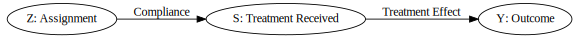

In [ ]:
from graphviz import Digraph

gr = Digraph(format="png", graph_attr={"rankdir": "LR", "size": "8"})
gr.node("Z", label="Z: Assignment")
gr.node("S", label="S: Treatment Received")
gr.node("Y", label="Y: Outcome")
gr.edge("Z", "S", label="Compliance")
gr.edge("S", "Y", label="Treatment Effect")

gr


#### SUTVA


## $S \perp\!\!\!\perp U$

Independence between $S$ and $U$ implies that the distribution of potential outcomes \( Y \) given treatment status is the same across groups:

$$
P(Y \mid S=1, U) = P(Y \mid S=0, U).
$$

A crucial implication of this independence is that the treatment and control groups should exhibit similarity in their characteristics:

$$
P(U \mid S=1) = P(U \mid S=0).
$$

Thus, any observed differences in outcomes can be attributed to the treatment \( S \), rather than confounding factors \( U \).


One way to verify the randomization worked properly is to ensure **covariate balance** between treated and control groups.



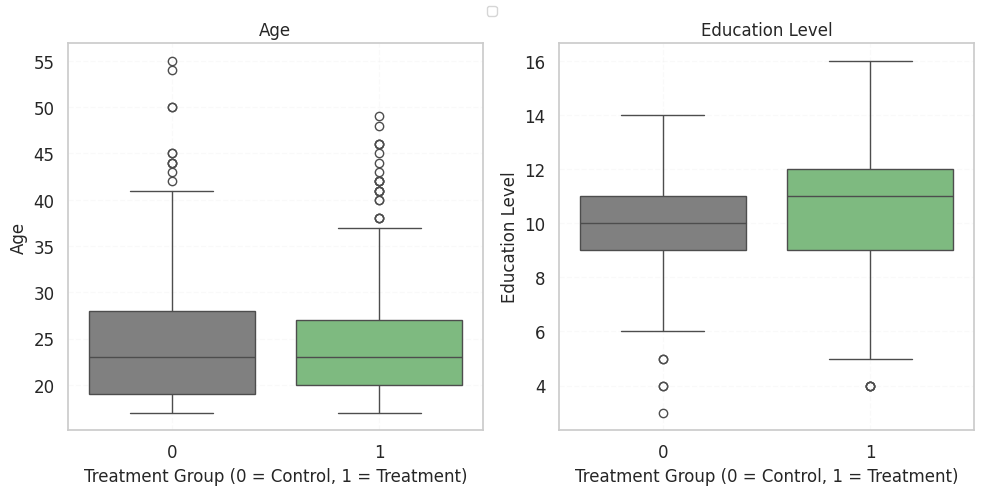

In [ ]:
covariates = {
    'age': 'Age',
    'education': 'Education Level'
    }

sns.set(style='whitegrid', palette='deep')
fig, axes = plt.subplots(1, len(covariates), figsize=(10, 5))
for ax, (key, value) in zip(axes, covariates.items()):
    sns.boxplot(
        x='treat',
        y=key,
        data=data,
        ax=ax,
        hue='treat',
        palette={0: 'gray', 1: '#74c476'},
        legend=False
    )
    ax.set_title(f'{value}')
    ax.set_xlabel('Treatment Group (0 = Control, 1 = Treatment)')
    ax.set_ylabel(value)
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(True, linestyle='--', alpha=0.1)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, fontsize=9, loc='upper center', ncol=len(covariates))
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy import stats
from tabulate import tabulate

# Initialize an empty balance test table
balance_table = pd.DataFrame(columns=['Variable', 'Control Mean', 'Treatment Mean', 'SMD', 'P-Value'])
# List of covariates to test
covariates = ['age', 'education', 'black', 'hispanic', 'married', 'nodegree']

# Perform t-tests and calculate SMD for each covariate
for var in covariates:
    control_group = data[data['treat'] == 0][var]
    treatment_group = data[data['treat'] == 1][var]

    # Calculate means and standard deviations
    control_mean = control_group.mean()
    treatment_mean = treatment_group.mean()
    control_std = control_group.std()
    treatment_std = treatment_group.std()

    # Perform t-test
    t_stat, p_value = stats.ttest_ind(control_group, treatment_group, equal_var=False)

    # Calculate standardized mean difference (SMD)
    pooled_std = ((control_std ** 2 + treatment_std ** 2) / 2) ** 0.5
    smd = (treatment_mean - control_mean) / pooled_std

    # Append results to the balance table
    new_row = pd.DataFrame({
        'Variable': [var],
        'Control Mean': [f'{control_mean:.2f} ({control_std:.2f})'],
        'Treatment Mean': [f'{treatment_mean:.2f} ({treatment_std:.2f})'],
        'SMD': [f'{smd:.3f}'],
        'P-Value': [f'{p_value:.3f}']
    })

    balance_table = pd.concat([balance_table, new_row], ignore_index=True)

tabulate(balance_table, headers='keys', tablefmt='github', showindex=False)


'| Variable   | Control Mean   | Treatment Mean   |    SMD |   P-Value |\n|------------|----------------|------------------|--------|-----------|\n| age        | 24.45 (6.59)   | 24.63 (6.69)     |  0.027 |     0.722 |\n| education  | 10.19 (1.62)   | 10.38 (1.82)     |  0.112 |     0.144 |\n| black      | 0.80 (0.40)    | 0.80 (0.40)      |  0.003 |     0.965 |\n| hispanic   | 0.11 (0.32)    | 0.09 (0.29)      | -0.061 |     0.415 |\n| married    | 0.16 (0.36)    | 0.17 (0.37)      |  0.029 |     0.703 |\n| nodegree   | 0.81 (0.39)    | 0.73 (0.44)      | -0.2   |     0.009 |'

In [ ]:
balance_table

,Variable,Control Mean,Treatment Mean,SMD,P-Value
0,age,24.45 (6.59),24.63 (6.69),0.027,0.722
1,education,10.19 (1.62),10.38 (1.82),0.112,0.144
2,black,0.80 (0.40),0.80 (0.40),0.003,0.965
3,hispanic,0.11 (0.32),0.09 (0.29),-0.061,0.415
4,married,0.16 (0.36),0.17 (0.37),0.029,0.703
5,nodegree,0.81 (0.39),0.73 (0.44),-0.200,0.009


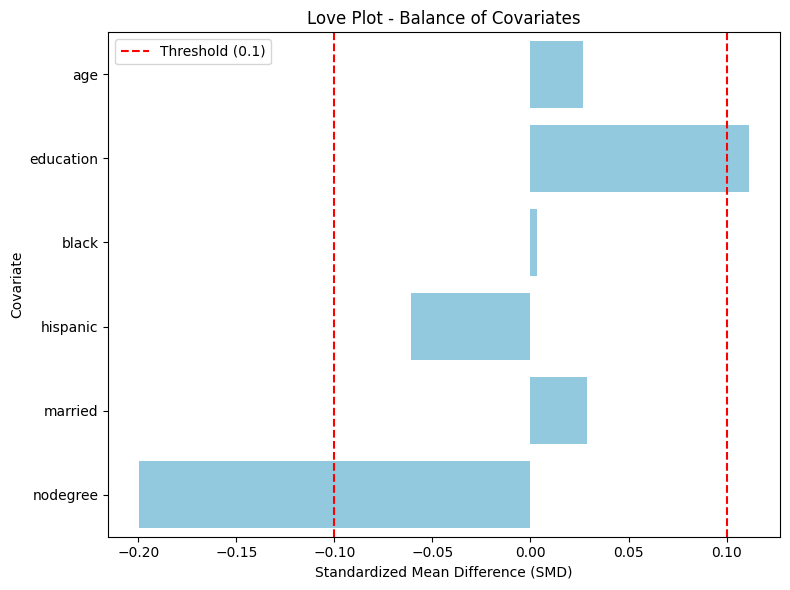

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# List of covariates to test
covariates = ['age', 'education', 'black', 'hispanic', 'married', 'nodegree']

# Initialize an empty list to store SMD results
smd_list = []

# Calculate standardized mean differences (SMD)
for var in covariates:
    control_group = data[data['treat'] == 0][var]
    treatment_group = data[data['treat'] == 1][var]

    # Calculate means and standard deviations
    control_mean = control_group.mean()
    treatment_mean = treatment_group.mean()
    control_std = control_group.std()
    treatment_std = treatment_group.std()

    # Calculate pooled standard deviation
    pooled_std = np.sqrt((control_std**2 + treatment_std**2) / 2)

    # Calculate SMD
    smd = (treatment_mean - control_mean) / pooled_std
    smd_list.append(smd)

# Create a DataFrame for the SMDs
smd_df = pd.DataFrame({
    'Covariate': covariates,
    'SMD': smd_list
})

# Plot the Love plot
plt.figure(figsize=(8, 6))
sns.barplot(x='SMD', y='Covariate', data=smd_df, color='skyblue')

# Add vertical lines for thresholds (e.g., SMD < 0.1 is balanced)
plt.axvline(x=0.1, color='red', linestyle='--', label='Threshold (0.1)')
plt.axvline(x=-0.1, color='red', linestyle='--')

# Set labels and title
plt.xlabel('Standardized Mean Difference (SMD)')
plt.ylabel('Covariate')
plt.title('Love Plot - Balance of Covariates')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


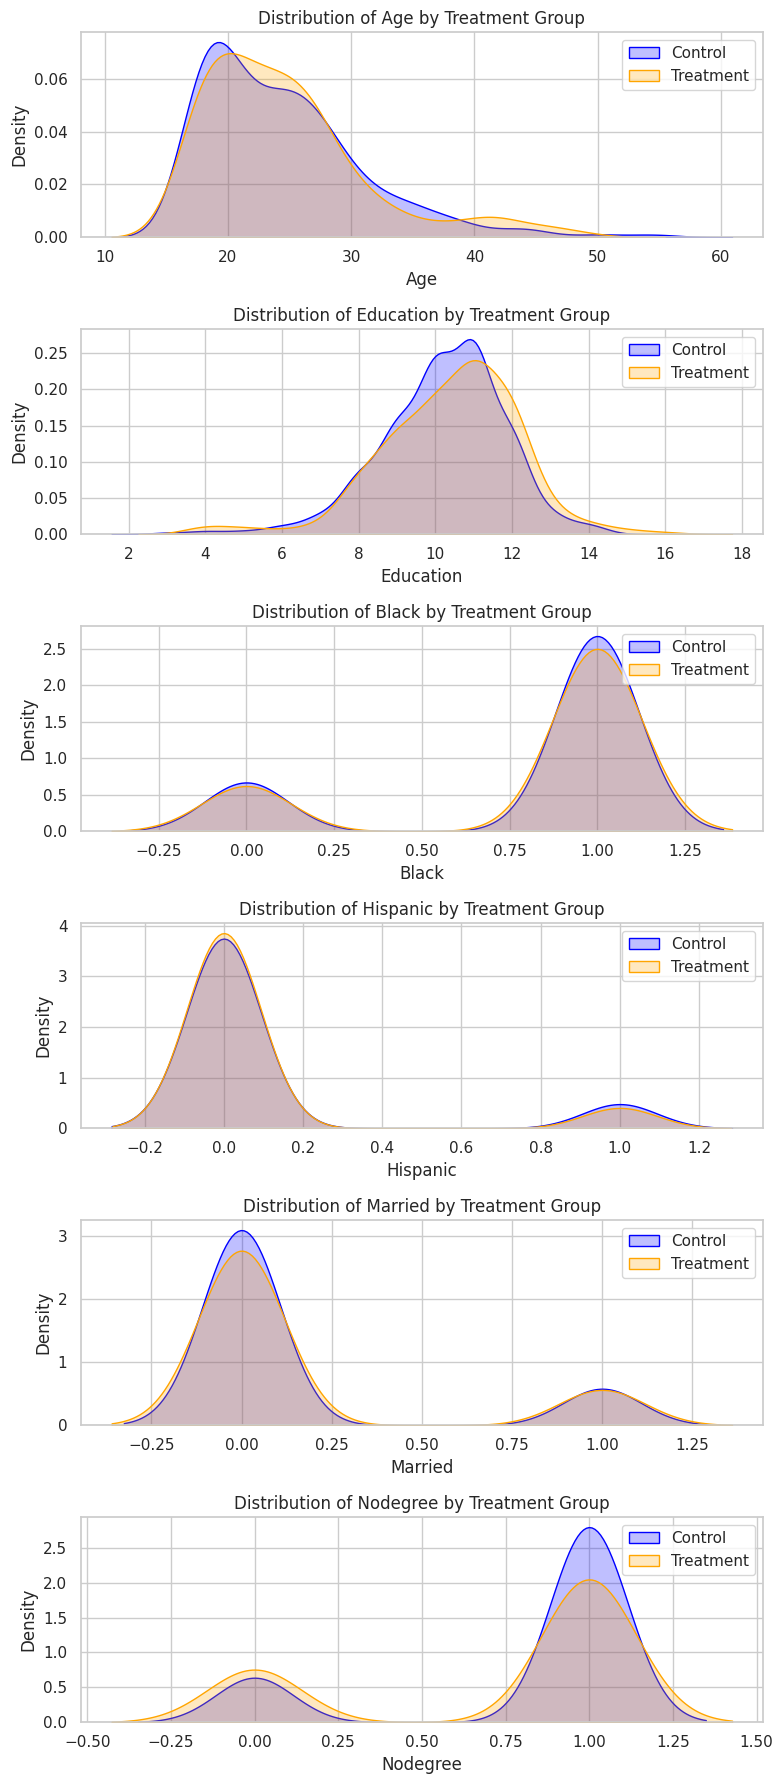

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# List of covariates to plot
covariates = ['age', 'education', 'black', 'hispanic', 'married', 'nodegree']

# Set plot style
sns.set(style="whitegrid")

# Create subplots for each covariate
fig, axes = plt.subplots(nrows=len(covariates), ncols=1, figsize=(8, len(covariates) * 3))

for i, var in enumerate(covariates):
    # Create a density plot for each covariate, comparing treatment and control groups
    sns.kdeplot(data[data['treat'] == 0][var], ax=axes[i], label="Control", fill=True, color='blue')
    sns.kdeplot(data[data['treat'] == 1][var], ax=axes[i], label="Treatment", fill=True, color='orange')

    # Set title and labels
    axes[i].set_title(f'Distribution of {var.capitalize()} by Treatment Group')
    axes[i].set_xlabel(var.capitalize())
    axes[i].set_ylabel('Density')

    # Add legend
    axes[i].legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


<ipython-input-75-7ca7b19d12f5>:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='treat', y=var, data=data, ax=axes[j], ci=None)
<ipython-input-75-7ca7b19d12f5>:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='treat', y=var, data=data, ax=axes[j], ci=None)
<ipython-input-75-7ca7b19d12f5>:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='treat', y=var, data=data, ax=axes[j], ci=None)
<ipython-input-75-7ca7b19d12f5>:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='treat', y=var, data=data, ax=axes[j], ci=None)


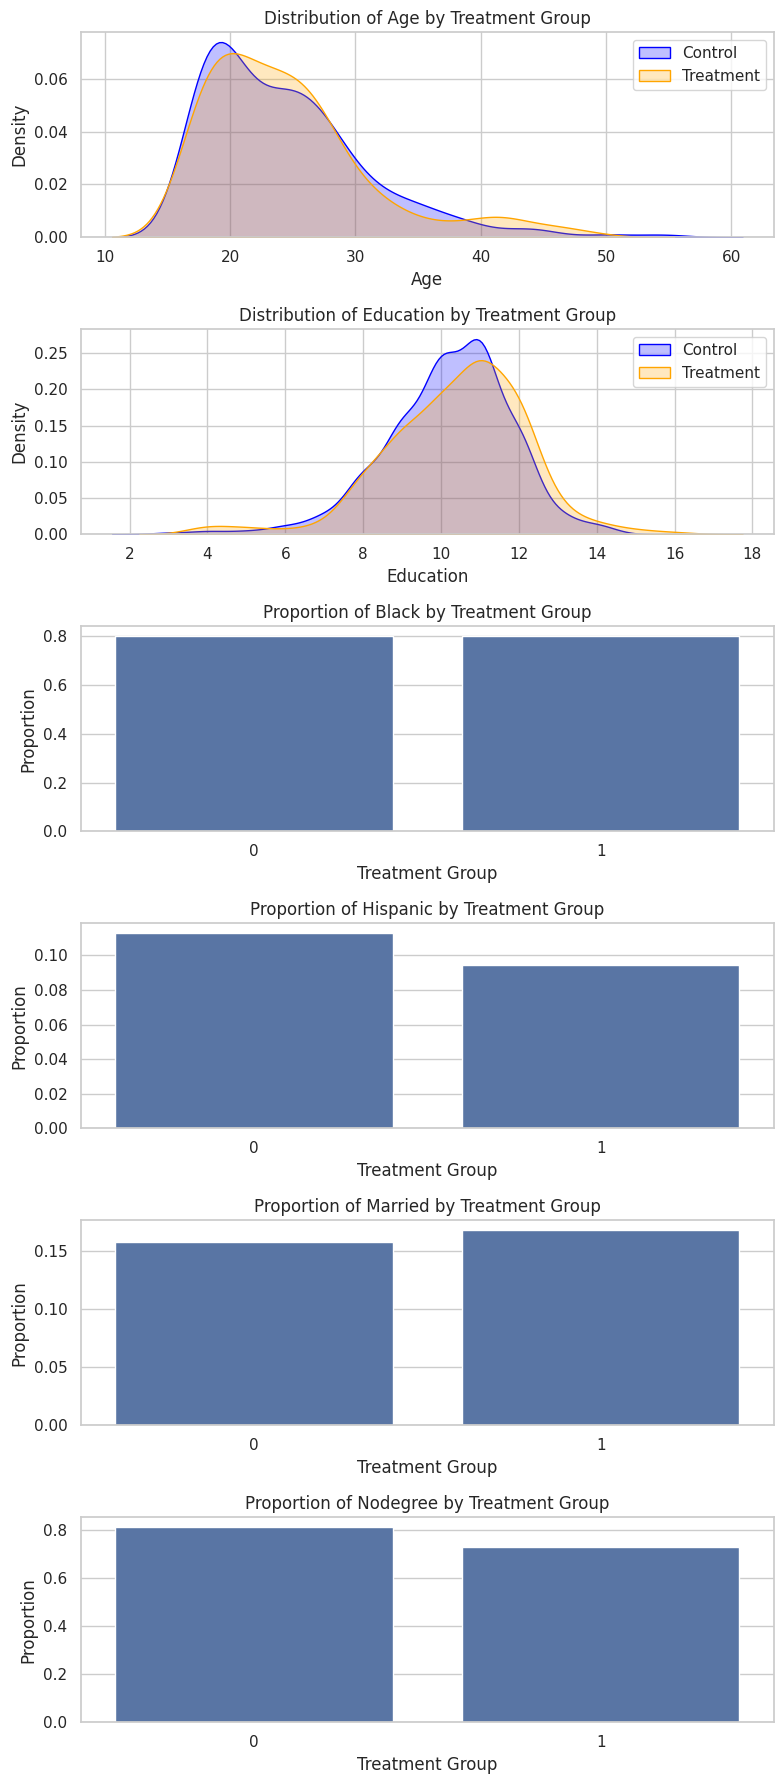

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define continuous and dummy covariates separately
continuous_covariates = ['age', 'education']
dummy_covariates = ['black', 'hispanic', 'married', 'nodegree']

# Set plot style
sns.set(style="whitegrid")

# Calculate the total number of subplots needed
total_covariates = len(continuous_covariates) + len(dummy_covariates)

# Create subplots for each covariate
fig, axes = plt.subplots(nrows=total_covariates, ncols=1, figsize=(8, total_covariates * 3))

# Plot continuous covariates with KDE plots
for i, var in enumerate(continuous_covariates):
    sns.kdeplot(data[data['treat'] == 0][var], ax=axes[i], label="Control", fill=True, color='blue')
    sns.kdeplot(data[data['treat'] == 1][var], ax=axes[i], label="Treatment", fill=True, color='orange')
    axes[i].set_title(f'Distribution of {var.capitalize()} by Treatment Group')
    axes[i].set_xlabel(var.capitalize())
    axes[i].set_ylabel('Density')
    axes[i].legend()

# Plot dummy covariates with bar plots
for j, var in enumerate(dummy_covariates, start=len(continuous_covariates)):
    sns.barplot(x='treat', y=var, data=data, ax=axes[j], ci=None)
    axes[j].set_title(f'Proportion of {var.capitalize()} by Treatment Group')
    axes[j].set_xlabel('Treatment Group')
    axes[j].set_ylabel('Proportion')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



## 3. Experiments: Imperfect Compliance and SUTVA Violations

### 3.1. Imperfect Compliance

Imperfect compliance occurs when participants don't fully adhere to their assigned group in a study. Some in the treatment group may not receive the intervention, while some in the control group may still access it. This can bias results, as the actual treatment received may differ from what was assigned.

An effective alternative to estimating the ATE is to focus on the Intent-to-Treat Effect (ITT), which measures the causal effect of assignment to treatment rather than the treatment itself.


Now, let's calculate the ITT for being told to run, where $SA = 1$ if assigned to run and $SA = 0$ otherwise. Let $Y(SA, U)$ represent blood pressure one month after assignment, with $U$ capturing all other factors affecting $Y$. The ITT is defined as:

$$
ITT = E[Y(S_A = 1, U) - Y(S_A = 0, U)]
$$

This gives us the average effect of being told to run on blood pressure, holding everything else constant.

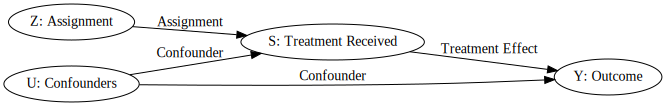

In [ ]:
from graphviz import Digraph

# Create a Directed Acyclic Graph (DAG)
gr = Digraph(format="png", graph_attr={"rankdir": "LR"})

# Define nodes and edges for non-compliance
gr.node("Z", label="Z: Assignment")  # Assignment (1 if assigned to treatment, 0 if not)
gr.node("S", label="S: Treatment Received")  # Treatment received (1 if treated, 0 if not)
gr.node("Y", label="Y: Outcome")  # Outcome
gr.node("U", label="U: Confounders")  # Unobserved confounders

# Assignment influences treatment received, but not all comply
gr.edge("Z", "S", label="Assignment")  # Assignment influences treatment received
gr.edge("U", "S", label="Confounder")  # Confounders may influence whether treatment is received
gr.edge("U", "Y", label="Confounder")  # Confounders also influence the outcome
gr.edge("S", "Y", label="Treatment Effect")  # Treatment received affects the outcome

gr


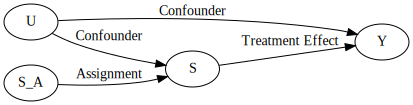

In [ ]:
from graphviz import Digraph

gr = Digraph(format="png", graph_attr={"rankdir":"LR"})

gr.edge("U", "S", label="Confounder")
gr.edge("U", "Y", label="Confounder")
gr.edge("S_A", "S", label="Assignment")
gr.edge("S", "Y", label="Treatment Effect")

gr


Estimated ITT: -0.27
Estimated ATE: -0.51


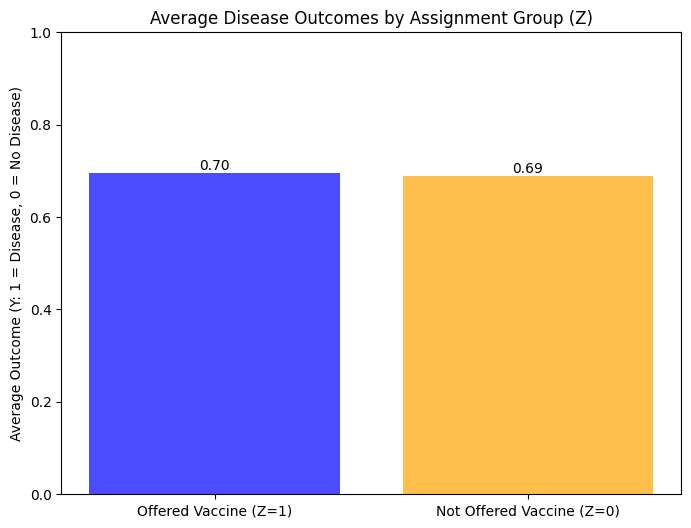

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate data
np.random.seed(0)  # For reproducibility
N = 1000  # Number of individuals
Z = np.random.binomial(1, 0.5, N)  # Random assignment: 50% offered vaccine
U = np.random.normal(0, 1, N)  # Unobserved confounders

# Logistic function to ensure probabilities between 0 and 1
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Define potential outcomes with logistic probabilities
Y0_probs = logistic(0.8 + 0.1 * U)  # Outcome probabilities if not treated
Y1_probs = logistic(0.6 + 0.1 * U)  # Outcome probabilities if treated

Y0 = np.random.binomial(1, Y0_probs)  # Outcome if not treated
Y1 = np.random.binomial(1, Y1_probs)  # Outcome if treated

# Observed outcome based on treatment received
Y = Y1 * Z + Y0 * (1 - Z)

# --- ITT estimation ---
# ITT is the effect of being assigned to treatment (Z)
itt_model = ols("Y ~ Z", data=data).fit()
itt = itt_model.params['Z']

# --- ATE estimation ---
# ATE is the effect of actually receiving treatment (S)
ate_model = ols("Y ~ S", data=data).fit()
ate = ate_model.params['S']

# Display results
print(f"Estimated ITT: {itt:.2f}")
print(f"Estimated ATE: {ate:.2f}")

# Calculate average outcomes for each group
mean_outcome_1 = np.mean(Y[Z == 1])  # Average for those offered the vaccine
mean_outcome_0 = np.mean(Y[Z == 0])  # Average for those not offered the vaccine

# Bar plot results
plt.figure(figsize=(8, 6))
bars = plt.bar(['Offered Vaccine (Z=1)', 'Not Offered Vaccine (Z=0)'],
                [mean_outcome_1, mean_outcome_0],
                color=['blue', 'orange'], alpha=0.7)

plt.title('Average Disease Outcomes by Assignment Group (Z)')
plt.ylabel('Average Outcome (Y: 1 = Disease, 0 = No Disease)')
plt.ylim(0, 1)  # Since Y is binary (0 or 1), set limits to [0, 1]

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.show()



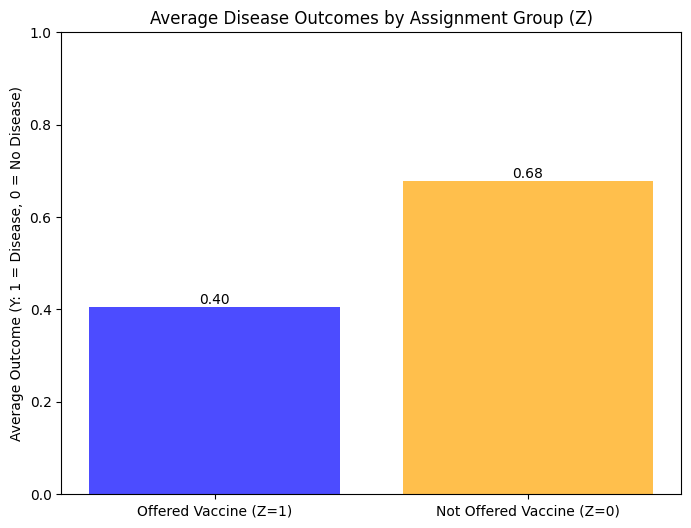

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming Y is the observed outcome array, Z is the assignment array
# Calculate average outcomes for each group
mean_outcome_1 = np.mean(Y[Z == 1])  # Average for those offered the vaccine
mean_outcome_0 = np.mean(Y[Z == 0])  # Average for those not offered the vaccine

# Bar plot results
plt.figure(figsize=(8, 6))
bars = plt.bar(['Offered Vaccine (Z=1)', 'Not Offered Vaccine (Z=0)'],
                [mean_outcome_1, mean_outcome_0],
                color=['blue', 'orange'], alpha=0.7)

plt.title('Average Disease Outcomes by Assignment Group (Z)')
plt.ylabel('Average Outcome (Y: 1 = Disease, 0 = No Disease)')
plt.ylim(0, 1)  # Since Y is binary (0 or 1), set limits to [0, 1]

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.show()


### 3.2. SUTVA violation

SUTVA implies two conditions:
1. No interference between units.-  The treatment of one unit doesn´t affect another unit.
2. Consistency.- Each unit has a single potential outcome under each treatment condition.

SUTVA violation occurs when the no interference assumption does not hold. This is known as a **spillover** effect, which means the

> treatment effect “spills over” to others who weren't treated.

Spillovers make it hard to estimate the “pure” effect of treatment because the control group may still be affected by the treatment due to interactions with treated units.

This means we cannot cleanly separate treated and untreated outcomes, which complicates our estimates. **How do we handle spillovers?**

One approach is to contain the spillovers within a defined group. Meaning, rather than randomizing individuals, we randomize entire groups or clusters. All units within a randomly selected group either receive treatment or no treatment at all.

Mathematically, if $S_G \perp U$, where $S_G$ represents the group-level treatment (and $U$ represents unobserved confounders), we assume that the assignment of treatment across groups is independent of the confounding variables.

This allows us to estimate the combined treatment effect and the spillover effect by comparing outcomes across treated and untreated groups. This gives us an ATE at the group level.

### Example of Group-level Randomization

Imagine we’re studying the effect of an educational intervention in schools. If we randomly assign some students to receive tutoring (the treatment), the knowledge gained by treated students may spill over to untreated students because of peer interactions.

To handle this, we could randomize entire classrooms or even schools to either receive the tutoring intervention or not. By doing this, we can estimate the treatment effect plus any spillover effects by comparing outcomes between schools, rather than between individual students.

### Estimating Direct and Indirect Effects

In some cases, it’s useful to disentangle the **direct** effects of treatment from the **indirect** or spillover effects. This requires additional assumptions or methods, such as:
### Identifying our parameter of interest:
Because $S_G \perp\!\!\!\perp U$, we have
$$\mathbb{E} [Y(S_G =1, U)−Y(S_G =0, U)]$$
by the same arguments that we identified the ATE before. This parameter includes the effects of the spillovers.
### Estimating from samples

We said we can estimate the ATE by way of conditional sample means -- if $S_G \perp\!\!\!\perp U$


$$\hat{\text{ATE}} =\mathbb{E}[Y(S_G =1, U)|S_G =1]−\mathbb{E}[Y(S_G =0, U)|S_G =0]$$

The conditional sample mean is a consistent, unbiased estimator for the conditional expectation if we have an iid sample
We don’t! The different sample distributions aren’t independent!

Thus, when we do a cluster randomized trial, we don’t have an iid sample - our sample is clustered!
One option would be to go “up a level” - treat the clusters themselves as the units of observation
If we believe the clusters are independent, then we have an iid sample of clusters

Thus, if you define $Y_G$ to be a school-level outcome, you can estimate an ATE of $S_G$ on $Y_G$.
Taking $U_G$ as the school-level “other causes,” in the all-causes model $Y_G(S_G,U_G)$, you can assume $S_G \perp U_G$ and get
$$\text{ATE}_G
=\mathbb{E}[Y_G(S_G =1,U_G)|S_G =1]−\mathbb{E}[Y_G(S_G =0,U_G)|S_G =0]$$






In [ ]:
# Define the data paths (replace these with your actual file paths)
da_path = "/content/namelist.dta"
dt_path = "/content/namelist_trans.dta"

# 1. Load the data, simulate "visit" and prepare as in Stata
df = pd.read_stata(da_path)

In [ ]:
df

,pupid,dupid,visit,schid,std,sex,obs,prs,totobs98,totprs98,...,sap1,sap2,sap3,sap4,std98v1,date,Tmonths,Isem1,Isem2,Isem3
0,1071714,1,"Visit 1, 1998",271.0,0.0,NaN,0,NaN,0,0,...,0,0,0,0,0.0,NaN,2,0,0,0
1,1071714,1,"Visit 2, 1998",NaN,NaN,NaN,0,NaN,0,0,...,0,0,0,0,0.0,NaN,6,0,0,0
2,1071714,1,"Visit 3, 1998",NaN,NaN,NaN,0,NaN,0,0,...,0,0,0,0,0.0,NaN,6,0,0,0
3,1071714,1,"Visit 4, 1998",NaN,NaN,NaN,0,NaN,0,0,...,0,0,0,0,0.0,NaN,6,0,0,0
4,1071714,1,"Visit 5, 1998",NaN,NaN,NaN,0,NaN,0,0,...,0,0,0,0,0.0,NaN,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556667,9146209,1,"Visit 4, 1999",NaN,NaN,1.0,0,NaN,1,1,...,0,0,0,1,7.0,NaN,18,0,0,0
556668,9146209,1,"Visit 5, 1999",NaN,NaN,1.0,0,NaN,1,1,...,0,0,0,1,7.0,NaN,18,0,0,0
556669,9146209,1,"Visit 6, 1999",NaN,NaN,1.0,0,NaN,1,1,...,0,0,0,1,7.0,NaN,18,0,0,0
556670,9146209,1,"Visit 7, 1999",NaN,NaN,1.0,0,NaN,1,1,...,0,0,0,1,7.0,NaN,22,0,0,0


In [ ]:
df = df.sort_values(by=['pupid', 'visit'])
df

,pupid,dupid,visit,schid,std,sex,obs,prs,totobs98,totprs98,...,sap1,sap2,sap3,sap4,std98v1,date,Tmonths,Isem1,Isem2,Isem3
0,1071714,1,"Visit 1, 1998",271.0,0.0,NaN,0,NaN,0,0,...,0,0,0,0,0.0,NaN,2,0,0,0
1,1071714,1,"Visit 2, 1998",NaN,NaN,NaN,0,NaN,0,0,...,0,0,0,0,0.0,NaN,6,0,0,0
2,1071714,1,"Visit 3, 1998",NaN,NaN,NaN,0,NaN,0,0,...,0,0,0,0,0.0,NaN,6,0,0,0
3,1071714,1,"Visit 4, 1998",NaN,NaN,NaN,0,NaN,0,0,...,0,0,0,0,0.0,NaN,6,0,0,0
4,1071714,1,"Visit 5, 1998",NaN,NaN,NaN,0,NaN,0,0,...,0,0,0,0,0.0,NaN,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556667,9146209,1,"Visit 4, 1999",NaN,NaN,1.0,0,NaN,1,1,...,0,0,0,1,7.0,NaN,18,0,0,0
556668,9146209,1,"Visit 5, 1999",NaN,NaN,1.0,0,NaN,1,1,...,0,0,0,1,7.0,NaN,18,0,0,0
556669,9146209,1,"Visit 6, 1999",NaN,NaN,1.0,0,NaN,1,1,...,0,0,0,1,7.0,NaN,18,0,0,0
556670,9146209,1,"Visit 7, 1999",NaN,NaN,1.0,0,NaN,1,1,...,0,0,0,1,7.0,NaN,22,0,0,0


In [ ]:
list(df['visit'].unique())

['Visit 1, 1998',
 'Visit 2, 1998',
 'Visit 3, 1998',
 'Visit 4, 1998',
 'Visit 5, 1998',
 'Visit 6, 1998',
 'Visit 7, 1998',
 'Visit 8, 1998',
 'Visit 1, 1999',
 'Visit 2, 1999',
 'Visit 3, 1999',
 'Visit 4, 1999',
 'Visit 5, 1999',
 'Visit 6, 1999',
 'Visit 7, 1999',
 'Visit 8, 1999']

In [ ]:
df[df['visit']=='Visit 1, 1998']

,pupid,visit,sex,obs,prs,sch98v1,wgrp1,wgrp2,wgrp3,elg,...,std98v1,yrbirth,sap1,sap2,sap3,sap4,Tmonths,Isem1,Isem2,Isem3
0,1071714,"Visit 1, 1998",NaN,0,NaN,271,0,0,1,1.0,...,0.0,1990.0,0,0,0,0,2,0,0,0
16,1080001,"Visit 1, 1998",0.0,1,0.0,108,0,0,1,1.0,...,0.0,1994.0,1,0,0,0,2,0,0,0
32,1080002,"Visit 1, 1998",0.0,1,1.0,108,0,0,1,1.0,...,0.0,1993.0,1,0,0,0,2,0,0,0
48,1080003,"Visit 1, 1998",0.0,1,0.0,108,0,0,1,1.0,...,0.0,1991.0,1,0,0,0,2,0,0,0
64,1080004,"Visit 1, 1998",0.0,1,0.0,108,0,0,1,1.0,...,Dropped out,1987.0,1,0,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556416,9107700,"Visit 1, 1998",NaN,0,NaN,183,0,1,0,NaN,...,6.0,1984.0,0,0,0,1,2,0,0,0
556432,9122700,"Visit 1, 1998",NaN,0,NaN,292,0,1,0,1.0,...,1.0,1989.0,0,0,0,0,2,0,0,0
556448,9125401,"Visit 1, 1998",1.0,1,1.0,119,0,1,0,1.0,...,7.0,1983.0,1,0,0,0,2,0,0,0
556464,9127006,"Visit 1, 1998",1.0,0,NaN,140,0,0,1,1.0,...,8.0,1982.0,0,1,0,0,2,0,0,0


In [ ]:

#df_f1 = df[df['visit'] == 981][['pupid', 'std']].rename(columns={'std': 'std98v1'})
df = df.merge(df_f1, on=['pupid'] , how='inner')

In [ ]:
df.columns

Index(['pupid', 'dupid', 'visit', 'schid', 'std', 'sex', 'obs', 'prs',
       'totobs98', 'totprs98', 'totpar98', 'totobs99', 'totprs99', 'totpar99',
       'totobs', 'totprs', 'totpart', 'sch98v1', 'wgrp', 'wgrp1', 'wgrp2',
       'wgrp3', 'yrbirth', 'elg98', 'elg99', 'stdgap', 'sap1', 'sap2', 'sap3',
       'sap4', 'std98v1_x', 'date', 'Tmonths', 'Isem1', 'Isem2', 'Isem3',
       'std98v1_y'],
      dtype='object')

In [ ]:
# Keep relevant columns
df_f1 = df[['pupid', 'visit', 'std', 'std98v1_x', 'prs', 'wgrp1', 'wgrp2', 'sch98v1', 'elg98', 'sex', 'yrbirth']]


In [ ]:
df_f1 = df

In [ ]:
df_f1[(df_f1['visit'] > 981) & (df_f1['visit'] < 993) & (df_f1['elg98'] == 1)]


TypeError: Invalid comparison between dtype=category and int

In [ ]:
df_panel_a_row1

,pupid,visit,std,std98v1_x,prs,wgrp1,wgrp2,sch98v1,elg98,sex,yrbirth


In [ ]:
df_panel_a_row1 = df_f1
# Collapse the data at the school level (sch98v1)
df_panel_a_row1_summary = df_panel_a_row1.groupby('sch98v1').agg(
    np=('pupid', 'size'),
    prs=('prs', 'sum'),
    wgrp1=('wgrp1', 'sum'),
    wgrp2=('wgrp2', 'sum')
).reset_index()

# Weighted regression using statsmodels
X = df_panel_a_row1_summary[['wgrp1']]  # independent variable
X = sm.add_constant(X)  # adds a constant term to the predictor
y = df_panel_a_row1_summary['prs']  # dependent variable

# First regression: prs on wgrp1
model1 = sm.WLS(y, X, weights=df_panel_a_row1_summary['np']).fit()  # weighted regression
print(model1.summary())

# Second regression: prs on wgrp1 and wgrp2
X = df_panel_a_row1_summary[['wgrp1', 'wgrp2']]
X = sm.add_constant(X)
model2 = sm.WLS(y, X, weights=df_panel_a_row1_summary['np']).fit()
print(model2.summary())

# Clear temp data for the next part of the analysis
del df_panel_a_row1, df_panel_a_row1_summary


                            WLS Regression Results                            
Dep. Variable:                    prs   R-squared:                       0.024
Model:                            WLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.832
Date:                Mon, 30 Sep 2024   Prob (F-statistic):              0.180
Time:                        22:32:53   Log-Likelihood:                -646.13
No. Observations:                  75   AIC:                             1296.
Df Residuals:                      73   BIC:                             1301.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2558.6312    175.257     14.599      0.0

<ipython-input-77-0c2af418a8a0>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_panel_a_row1_summary = df_panel_a_row1.groupby('sch98v1').agg(


In [ ]:


# PANEL A, ROW 1 - Analysis for eligible students with visit between 981 and 993
df_panel_a_row1 = df_f1[(df_f1['visit'] > 981) & (df_f1['visit'] < 993) & (df_f1['elg98'] == 1)]

# Collapse the data at the school level (sch98v1)
df_panel_a_row1_summary = df_panel_a_row1.groupby('sch98v1').agg(
    np=('pupid', 'size'),
    prs=('prs', 'sum'),
    wgrp1=('wgrp1', 'sum'),
    wgrp2=('wgrp2', 'sum')
).reset_index()

# Weighted regression using statsmodels
X = df_panel_a_row1_summary[['wgrp1']]  # independent variable
X = sm.add_constant(X)  # adds a constant term to the predictor
y = df_panel_a_row1_summary['prs']  # dependent variable

# First regression: prs on wgrp1
model1 = sm.WLS(y, X, weights=df_panel_a_row1_summary['np']).fit()  # weighted regression
print(model1.summary())

# Second regression: prs on wgrp1 and wgrp2
X = df_panel_a_row1_summary[['wgrp1', 'wgrp2']]
X = sm.add_constant(X)
model2 = sm.WLS(y, X, weights=df_panel_a_row1_summary['np']).fit()
print(model2.summary())

# Clear temp data for the next part of the analysis
del df_panel_a_row1, df_panel_a_row1_summary

# PANEL A, ROW 2 - For ineligible students (elg98 == 0)
df_panel_a_row2 = df_f1[(df_f1['visit'] > 981) & (df_f1['visit'] < 993) & (df_f1['elg98'] == 0)]

# Collapse data and perform regressions as in row 1
df_panel_a_row2_summary = df_panel_a_row2.groupby('sch98v1').agg(
    np=('pupid', 'size'),
    prs=('prs', 'sum'),
    wgrp1=('wgrp1', 'sum'),
    wgrp2=('wgrp2', 'sum')
).reset_index()

# First regression: prs on wgrp1
X = df_panel_a_row2_summary[['wgrp1']]
X = sm.add_constant(X)
y = df_panel_a_row2_summary['prs']
model1 = sm.WLS(y, X, weights=df_panel_a_row2_summary['np']).fit()
print(model1.summary())

# Second regression: prs on wgrp1 and wgrp2
X = df_panel_a_row2_summary[['wgrp1', 'wgrp2']]
X = sm.add_constant(X)
model2 = sm.WLS(y, X, weights=df_panel_a_row2_summary['np']).fit()
print(model2.summary())

# You would repeat this structure for each subsequent panel row (PANEL A, ROW 3 - 8)
# For example, PANEL A, ROW 3 would filter by students with std98v1 between 0 and 2

# Example for PANEL A, ROW 3
df_panel_a_row3 = df_f1[(df_f1['visit'] > 981) & (df_f1['visit'] < 993) &
                        (df_f1['elg98'] == 1) & (df_f1['std98v1'].isin([0, 1, 2]))]

df_panel_a_row3_summary = df_panel_a_row3.groupby('sch98v1').agg(
    np=('pupid', 'size'),
    prs=('prs', 'sum'),
    wgrp1=('wgrp1', 'sum'),
    wgrp2=('wgrp2', 'sum')
).reset_index()

X = df_panel_a_row3_summary[['wgrp1']]
X = sm.add_constant(X)
y = df_panel_a_row3_summary['prs']
model1 = sm.WLS(y, X, weights=df_panel_a_row3_summary['np']).fit()
print(model1.summary())

X = df_panel_a_row3_summary[['wgrp1', 'wgrp2']]
X = sm.add_constant(X)
model2 = sm.WLS(y, X, weights=df_panel_a_row3_summary['np']).fit()
print(model2.summary())

# Continue for each row...

# For PANEL B, repeat with the adjusted visit range
df_panel_b_row1 = df_f1[(df_f1['visit'] > 992) & (df_f1['visit'] < 999) & (df_f1['elg98'] == 1)]
df_panel_b_row1_summary = df_panel_b_row1.groupby('sch98v1').agg(
    np=('pupid', 'size'),
    prs=('prs', 'sum'),
    wgrp1=('wgrp1', 'sum'),
    wgrp2=('wgrp2', 'sum')
).reset_index()

# Same regression structure for PANEL B...


TypeError: Invalid comparison between dtype=category and int

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols

# Simulating data for the Worms study
np.random.seed(42)

# Simulating group-level treatment assignment (schools)
schools = pd.DataFrame({
    'school_id': range(1, 101),
    'treatment': np.random.choice([0, 1], size=100, p=[0.5, 0.5])  # Randomly assigned treatment
})

# Simulating outcomes: direct and spillover effects
# Treated schools (direct + spillover), Control schools (no treatment)
schools['avg_outcome'] = np.where(schools['treatment'] == 1,
                                  np.random.normal(80, 5, size=100),  # Direct + Spillover effect
                                  np.random.normal(70, 5, size=100))  # Control schools

# Estimate the ATE via OLS regression
model = ols('avg_outcome ~ treatment', data=schools).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            avg_outcome   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     95.83
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           3.47e-16
Time:                        00:47:21   Log-Likelihood:                -295.65
No. Observations:                 100   AIC:                             595.3
Df Residuals:                      98   BIC:                             600.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.2756      0.646    108.841      0.0

In [ ]:
schools

,school_id,treatment,avg_outcome,untreated_outcome
0,1,0,70.065009,74.361603
1,2,1,78.504963,71.998916
2,3,1,80.458804,75.349010
3,4,1,70.062155,73.073432
4,5,0,73.128337,65.801391
...,...,...,...,...
95,96,0,62.820689,58.490394
96,97,1,79.614491,82.255718
97,98,0,70.051165,76.834371
98,99,0,65.092457,78.224839


In [ ]:
# Adding untreated students data (spillover effect within treated schools)
schools['untreated_outcome'] = np.where(schools['treatment'] == 1,
                                        np.random.normal(75, 5, size=100),  # Spillover in treated schools
                                        np.random.normal(70, 5, size=100))  # Untreated in control schools

# Direct effect: Difference between treated and control schools for treated students
direct_model = ols('avg_outcome ~ treatment', data=schools).fit()
print("Direct Effect Estimate:")
print(direct_model.summary())

# Spillover effect: Difference between untreated students in treated vs control schools
spillover_model = ols('untreated_outcome ~ treatment', data=schools).fit()
print("Spillover Effect Estimate:")
print(spillover_model.summary())


Direct Effect Estimate:
                            OLS Regression Results                            
Dep. Variable:            avg_outcome   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     95.83
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           3.47e-16
Time:                        00:48:03   Log-Likelihood:                -295.65
No. Observations:                 100   AIC:                             595.3
Df Residuals:                      98   BIC:                             600.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.2756      0

      T_1         T_2        T_3        T_4
       |           |          |          |
     Y_1 <------- Y_2 <----- Y_3 ------ Y_4


## 4. Recap on sampling distributions and the Central Limit Theorem (CLT) on Python -- HELP FOR HOMEWORK!

When we want to sample from a **uniform distribution**, we're interested in generating random values that have an equal likelihood of falling anywhere within a specified interval. This can be accomplished using the NumPy library in Python.

In [38]:
# Set random seed for reproducibility
np.random.seed(42)

To draw samples from a uniform distribution, we can use the following function:

```python
np.random.uniform(low, high, size)
```

**Parameters**:
  - `low`: The lower bound of the interval (inclusive).
  - `high`: The upper bound of the interval (exclusive).
  - `size`: This parameter specifies the shape of the output array.

Note that samples are drawn from the half-open interval: $$[\text{low}, \text{high}).$$

Say we want to generate samples uniformly distributed over $[-1, 1]$. To include 1 in the upper bound, we can add a small value, called **epsilon**, which is the smallest representable positive number such that \(1 + \text{epsilon}\) is greater than $1$.

```python
np.random.uniform(-1, 1 + np.finfo(float).eps, size)
```

Lastly, the `size=(num_samples, n)` parameter can be a tuple to define the shape of the generated array.

- **`num_samples`**: This represents the number of independent samples or trials we want to generate.
- **`n`**: This is the number of random values (the sample size) in each trial.

In [51]:
# Generate samples
num_samples, n = 10, 5
samples = np.random.uniform(-1, 1 + np.finfo(float).eps, (num_samples, n))

In [52]:
len(samples)

10

In [53]:
samples[0]

array([0.93916926, 0.55026565, 0.87899788, 0.7896547 , 0.19579996])

In [54]:
# Compute sample means
sample_means = np.mean(samples, axis=1)
print(sample_means)

[ 6.70777489e-01 -3.69237112e-01 -1.49419333e-01  1.89019477e-02
 -4.79463897e-04 -1.80537218e-01 -1.23263900e-01  2.20709856e-01
  1.70347384e-01 -3.69048001e-01]


In [43]:
# Proportion of the sample means lie within the range [-0.1,0.1]
proportion = np.mean((sample_means >= -0.1) & (sample_means <= 0.1))
print(f"Proportion of the sample means lie within the range [-0.1,0.1]:", {proportion})

Proportion of the sample means lie within the range [-0.1,0.1]: {0.2}


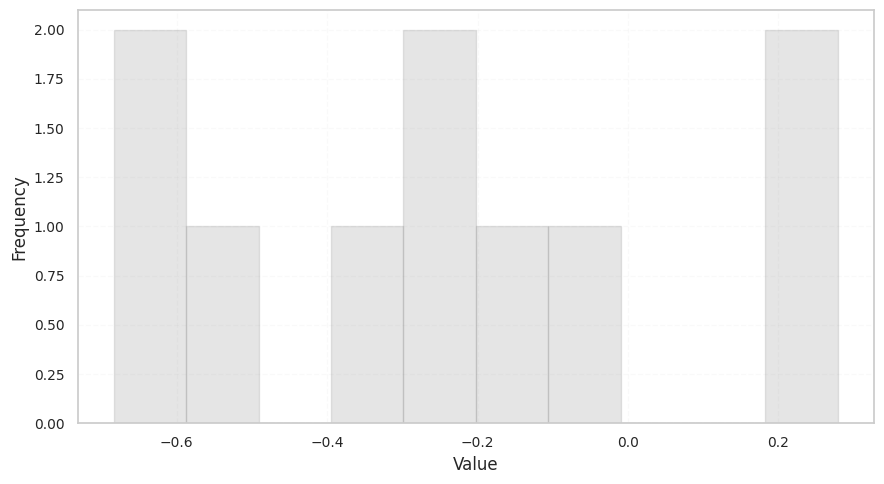

In [50]:
sns.set(style='whitegrid', palette='deep')
plt.figure(figsize=(9, 5))
plt.hist(sample_means * np.sqrt(n), bins=10, color='grey', edgecolor='grey', alpha=0.2)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.1)
plt.tight_layout()
plt.show()

## 5. Path Forward

+ Advanced Experiment Designs: Learn about more complex setups like testing multiple factors at once or studying changes over time.

---

**References:**


[^1]: Lalonde, R. J. (1986). *Evaluating the Econometric Evaluations of Training Programs with Experimental Data.* American Economic Review, 76(4), 604-620.
